In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')
import tqdm
import statistics

In [41]:
df = pd.read_excel("df_messi.xlsx")
df.database = df.database.astype(str)

In [42]:
df_teste = df.pivot(index='filial', columns='database', values='saldo')
df_teste.reset_index(inplace=True)
df_teste

database,filial,2019-05-01,2019-06-01,2019-07-01,2019-08-01,2019-09-01,2019-10-01,2019-11-01,2019-12-01,2020-01-01,...,2022-03-01,2022-04-01,2022-05-01,2022-06-01,2022-07-01,2022-08-01,2022-09-01,2022-10-01,2022-11-01,2022-12-01
0,MG,500044,500045,500046,500047,500048,500049,500050,500051,500052,...,500078,500079,500080,500081,500082,500083,500084,500085,500086,500087
1,SP,500000,500001,500002,500003,500004,500005,500006,500007,500008,...,500034,500035,500036,500037,500038,500039,500040,500041,500042,500043


In [43]:
for col in df_teste.columns:
    try:
        a = col.split("-")
        rename = a[1] + '/' + a[0]
        df_teste.rename(columns = {col:rename}, inplace = True)
    except:
        pass
        
df_teste

database,filial,05/2019,06/2019,07/2019,08/2019,09/2019,10/2019,11/2019,12/2019,01/2020,...,03/2022,04/2022,05/2022,06/2022,07/2022,08/2022,09/2022,10/2022,11/2022,12/2022
0,MG,500044,500045,500046,500047,500048,500049,500050,500051,500052,...,500078,500079,500080,500081,500082,500083,500084,500085,500086,500087
1,SP,500000,500001,500002,500003,500004,500005,500006,500007,500008,...,500034,500035,500036,500037,500038,500039,500040,500041,500042,500043


filial:  MG


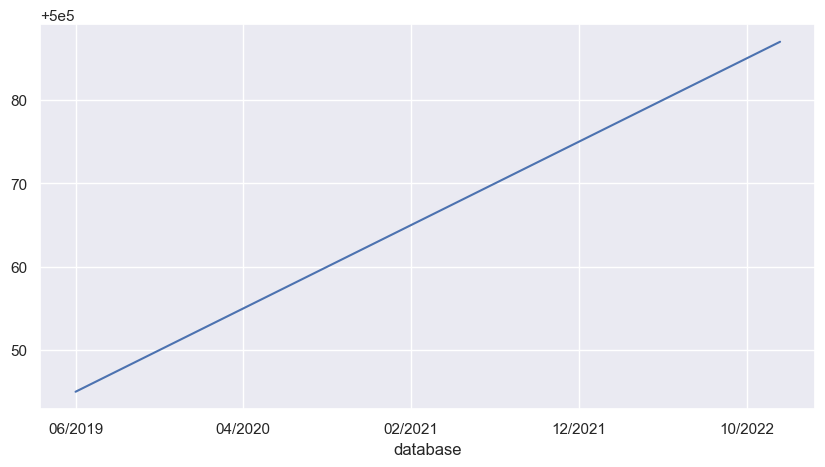

filial:  SP


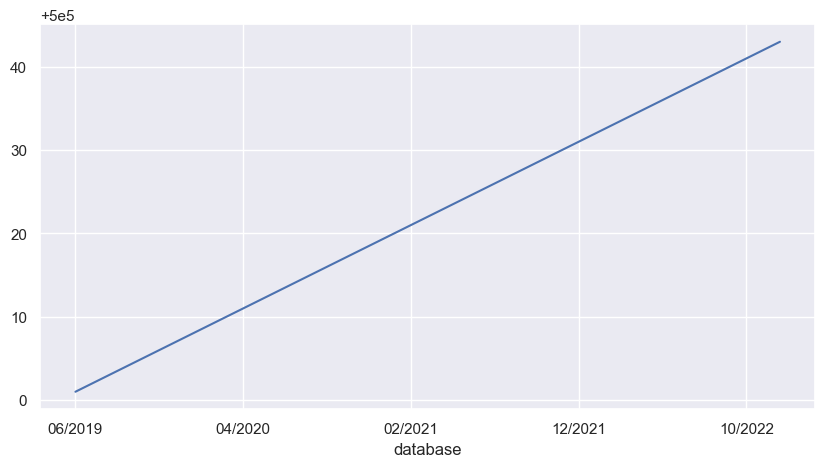

IndexError: single positional indexer is out-of-bounds

In [44]:
for a in range(5):
    print("filial: ", df_teste.iloc[a][0])
    sns.set_theme(style="darkgrid")
    row = df_teste.iloc[a,2:]
    row.plot(figsize=(10,5))
    plt.show()

In [46]:
from pmdarima.arima import ADFTest
from pmdarima.arima import auto_arima
 
def adf(serie):
    adf_teste = ADFTest(alpha=0.05)
    print(adf_teste.should_diff(serie))
   
 
def split_train_test(serie):
    train = serie[0:32]
    test = serie[-12:]
    return(train, test)
 
def prediction(train, test, serie):
    sarimaParameters = {'p': 1, 'd': 1, 'q': 4, 'P': 0, 'D': 0, 'Q': 0, 'm': 12}
    p = sarimaParameters['p']
    d = sarimaParameters['d']
    q = sarimaParameters['q']
    P = sarimaParameters['P']
    D = sarimaParameters['D']
    Q = sarimaParameters['Q']
    m = sarimaParameters['m']
#     arima = SARIMAX(train, order=(p, d, q), seasonal_order=(P, D, Q, m))
   
    arima = auto_arima(train, seasonal=True, random_state=20, start_p=0, d=1, start_q=0, max_p=5, max_d=5, max_q=5,
                      start_P=0, D=1, start_Q=0, max_P=5, max_D=5, max_Q=5, m=12, trace = True, stepwise=True,n_fits=20)
   
#     arima = arima.fit()
       
    media_movel = train.rolling(12).mean()
    media_movel = media_movel[-12:].values
   
    media_movel_2 = train.rolling(3).mean()
    media_movel_2 = media_movel_2[-12:].values
   
    media_movel_3 = train.rolling(6).mean()
    media_movel_3 = media_movel_3[-12:].values
   
    media_movel_4 = train.rolling(2).mean()
    media_movel_4 = media_movel_4[-12:].values
   
    prev_arima = arima.predict(n_periods = 12)
   
    
    prev_1 = (media_movel_2 + media_movel_4 + prev_arima)/3
    prev_2 = prev_arima
   
    
    # print(abs(sum(test) - sum(prev_1)), abs(sum(test) - sum(prev_2)))
   
    if abs(sum(test) - sum(prev_1)) > abs(sum(test) - sum(prev_2)):
        prev = prev_arima
    else:
        prev = prev_1
   
    previsoes = pd.DataFrame(prev, index=test.index, columns=['previsoes'])
   
    a = sum(prev)
    b = sum(test)
    d = (a/b-1)*100
   
    print('previsão de consumo ano: ', a)
    print('consumo real: ', b)
    print('erro percentual prev: {:.2f}%'.format(d))
   
    
    plt.figure(figsize=(8,5))
    plt.plot(train, label='treino')
    plt.plot(test, label='teste')
    plt.plot(previsoes, label='previsao_final')
    plt.legend(loc = 'upper left')
    plt.show()  
    
    
    return(b,a,d, arima)

  0%|                                                                                            | 0/2 [00:00<?, ?it/s]

################### Filial MG #####################
Performing stepwise search to minimize aic
 ARIMA(0,1,0)(0,1,0)[12]             : AIC=99.694, Time=0.01 sec
 ARIMA(1,1,0)(1,1,0)[12]             : AIC=inf, Time=0.25 sec
 ARIMA(0,1,1)(0,1,1)[12]             : AIC=inf, Time=0.27 sec
 ARIMA(0,1,0)(1,1,0)[12]             : AIC=139622.434, Time=0.06 sec
 ARIMA(0,1,0)(0,1,1)[12]             : AIC=inf, Time=0.08 sec
 ARIMA(0,1,0)(1,1,1)[12]             : AIC=inf, Time=0.21 sec
 ARIMA(1,1,0)(0,1,0)[12]             : AIC=101.586, Time=0.05 sec
 ARIMA(0,1,1)(0,1,0)[12]             : AIC=101.597, Time=0.05 sec
 ARIMA(1,1,1)(0,1,0)[12]             : AIC=103.431, Time=0.10 sec
 ARIMA(0,1,0)(0,1,0)[12] intercept   : AIC=99.094, Time=0.02 sec
 ARIMA(0,1,0)(1,1,0)[12] intercept   : AIC=inf, Time=0.22 sec
 ARIMA(0,1,0)(0,1,1)[12] intercept   : AIC=inf, Time=0.23 sec
 ARIMA(0,1,0)(1,1,1)[12] intercept   : AIC=93.786, Time=0.17 sec
 ARIMA(0,1,0)(2,1,1)[12] intercept   : AIC=95.786, Time=0.34 sec
 ARIMA

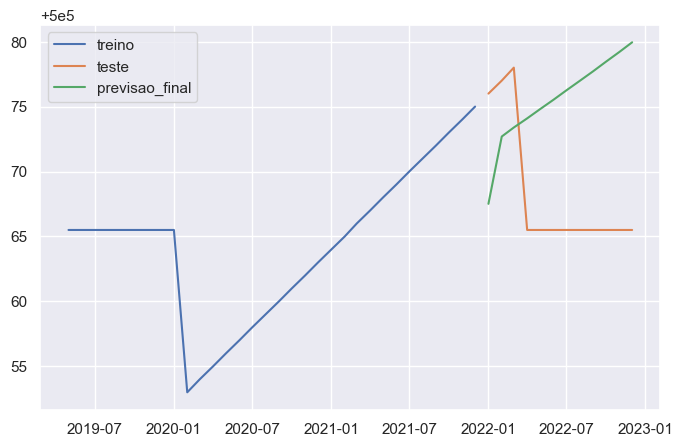

 50%|██████████████████████████████████████████                                          | 1/2 [00:42<00:42, 42.10s/it]

################### Filial SP #####################
Performing stepwise search to minimize aic
 ARIMA(0,1,0)(0,1,0)[12]             : AIC=99.694, Time=0.04 sec
 ARIMA(1,1,0)(1,1,0)[12]             : AIC=inf, Time=0.38 sec
 ARIMA(0,1,1)(0,1,1)[12]             : AIC=inf, Time=0.33 sec
 ARIMA(0,1,0)(1,1,0)[12]             : AIC=inf, Time=0.25 sec
 ARIMA(0,1,0)(0,1,1)[12]             : AIC=inf, Time=0.20 sec
 ARIMA(0,1,0)(1,1,1)[12]             : AIC=inf, Time=0.25 sec
 ARIMA(1,1,0)(0,1,0)[12]             : AIC=101.586, Time=0.03 sec
 ARIMA(0,1,1)(0,1,0)[12]             : AIC=101.597, Time=0.03 sec
 ARIMA(1,1,1)(0,1,0)[12]             : AIC=103.431, Time=0.07 sec
 ARIMA(0,1,0)(0,1,0)[12] intercept   : AIC=99.094, Time=0.02 sec
 ARIMA(0,1,0)(1,1,0)[12] intercept   : AIC=inf, Time=0.17 sec
 ARIMA(0,1,0)(0,1,1)[12] intercept   : AIC=inf, Time=0.32 sec
 ARIMA(0,1,0)(1,1,1)[12] intercept   : AIC=93.785, Time=0.18 sec
 ARIMA(0,1,0)(2,1,1)[12] intercept   : AIC=95.785, Time=0.36 sec
 ARIMA(0,1,0)

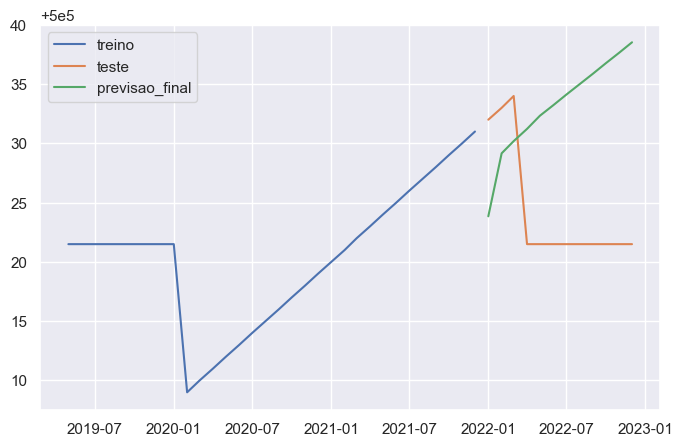

100%|████████████████████████████████████████████████████████████████████████████████████| 2/2 [00:48<00:00, 24.48s/it]


In [53]:
resultados = [[]]
for a in tqdm.tqdm(range(len(df_teste))): 
#for a in range(10):
    row = df_teste.iloc[a,1:]
    
    df_comb =pd.DataFrame(list(zip(row.index,row)),columns=['DATE','VALUE'])
    
    df_comb['DATE'] = pd.to_datetime(df_comb['DATE'], format="%m/%Y")
    df_comb['VALUE'] = df_comb['VALUE'].astype(float)
   
    serie = pd.Series(df_comb['VALUE'].values, index = df_comb['DATE'])
   
    
    # removendo outliers
    median = serie.median()
    std = serie.std()
    outliers = (serie - median).abs() > std
    serie[outliers] = median
   
    
    
 
   
    print('################### Filial ' + str(df_teste.iloc[a,0]) + ' #####################')
 
    train, test = split_train_test(serie)
    consumo,previsao,erro, modelo = prediction(train, test, serie)
   
    resultados.append((str(df_teste.iloc[a,0]), previsao, consumo, erro, modelo))

0.0014339123277418153
0.6666666666666666
0.6666666666666666
0.6666666666666666
0.6666666666666666
3


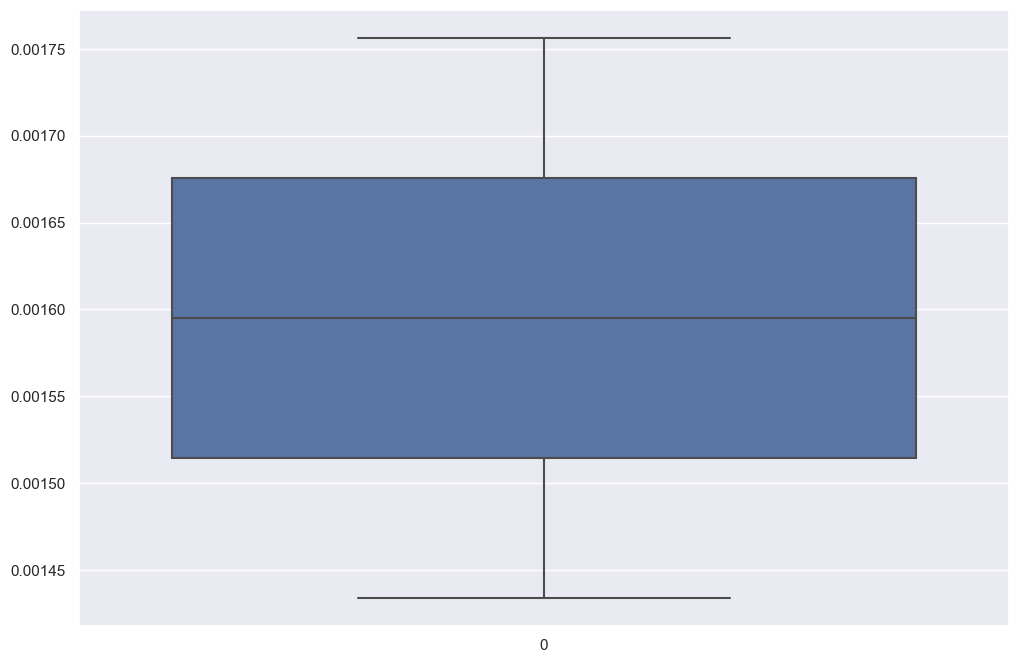

In [54]:
df_resultados = pd.DataFrame(resultados, columns = ['filial', 'previsao', 'consumo', 'erro', 'modelo'])
df_resultados.dropna()
 
erros = df_resultados['erro'].values
print(statistics.median(erros))
 
f = plt.figure(figsize=(12,8))
sns.boxplot(data = erros)
 
qtd = 0
for erro in erros:
    if erro > -2 and erro < 2:
        qtd = qtd + 1
print(qtd/len(erros))
 
qtd = 0
for erro in erros:
    if erro > -5 and erro < 5:
        qtd = qtd + 1
print(qtd/len(erros))
 
qtd = 0
for erro in erros:
    if erro > -7 and erro < 7:
        qtd = qtd + 1
print(qtd/len(erros))
 
qtd = 0
for erro in erros:
    if erro > -10 and erro < 10:
        qtd = qtd + 1
print(qtd/len(erros))
 
 
print(len(df_resultados))

In [60]:
######################### XGBoost ######################
import pandas as pd
from sklearn.datasets import load_boston
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
 
 
# forecast monthly births with xgboost
from numpy import asarray
from pandas import read_csv
from pandas import DataFrame
from pandas import concat
from sklearn.metrics import mean_absolute_error
from xgboost import XGBRegressor
from matplotlib import pyplot
 
# transform a time series dataset into a supervised learning dataset
def series_to_supervised(data, n_in=1, n_out=1, dropnan=True):
    n_vars = 1 if type(data) is list else data.shape[0]
    df = DataFrame(data)
    cols = list()
    # input sequence (t-n, ... t-1)
    for i in range(n_in, 0, -1):
        cols.append(df.shift(i))
    # forecast sequence (t, t+1, ... t+n)
    for i in range(0, n_out):
        cols.append(df.shift(-i))
    # put it all together
    agg = concat(cols, axis=1)
    # drop rows with NaN values
    if dropnan:
        agg.dropna(inplace=True)
    return agg.values
 
# split a univariate dataset into train/test sets
def train_test_split(data, n_test):
    return data[:-n_test, :], data[-n_test:, :]
 
# fit an xgboost model and make a one step prediction
def xgboost_forecast(train, testX):
    # transform list into array
    train = asarray(train)
    # split into input and output columns
    trainX, trainy = train[:, :-1], train[:, -1]
    # fit model
    model = XGBRegressor(objective='reg:squarederror', n_estimators=1000)
    model.fit(trainX, trainy)
    # make a one-step prediction
    yhat = model.predict(asarray([testX]))
    return yhat[0]
 
# walk-forward validation for univariate data
def walk_forward_validation(data, n_test):
    predictions = list()
    # split dataset
    train, test = train_test_split(data, n_test)
    # seed history with training dataset
    history = [x for x in train]
    # step over each time-step in the test set
    for i in range(len(test)):
        # split test row into input and output columns
        testX, testy = test[i, :-1], test[i, -1]
        # fit model on history and make a prediction
        yhat = xgboost_forecast(history, testX)
        # store forecast in list of predictions
        predictions.append(yhat)
        # add actual observation to history for the next loop
        history.append(test[i])
        # summarize progress
#         print('>expected=%.1f, predicted=%.1f' % (testy, yhat))
    # estimate prediction error
    error = mean_absolute_error(test[:, -1], predictions)
    return error, test[:, -1], predictions

In [61]:
resultados = [[]]
for a in tqdm.tqdm(range(len(df_teste))): 
    row = df_teste.iloc[a,1:]
    
    df_comb =pd.DataFrame(list(zip(row.index,row)),columns=['DATE','VALUE'])
    
    df_comb['DATE'] = pd.to_datetime(df_comb['DATE'], format="%m/%Y")
    df_comb['VALUE'] = df_comb['VALUE'].astype(float)
   
    serie = pd.Series(df_comb['VALUE'].values, index = df_comb['DATE'])
 
    values = serie.values
    # transform the time series data into supervised learning
    n_in=18
    data = series_to_supervised(values, n_in)
    # evaluate
    mae, y, yhat = walk_forward_validation(data, 2*n_in)
    print('MAE: %.3f' % mae)
    # plot expected vs preducted


    yhat = pd.DataFrame(yhat, index=df_comb['DATE'].iloc[:-(2*n_in-1)], columns=['predito'])
    y = pd.DataFrame(y, index=df_comb['DATE'].iloc[:-(2*n_in-1)], columns=['experado'])

    plt.figure(figsize=(8,5))
    plt.plot(y, label='Expected')
    plt.plot(yhat, label='Predicted')
    plt.legend()
    plt.show()

  0%|                                                                                            | 0/2 [00:00<?, ?it/s]


IndexError: too many indices for array: array is 1-dimensional, but 2 were indexed

In [67]:
############### JANELAMENTO #############
from statsmodels.tsa.statespace.sarimax import SARIMAX
import plotly.graph_objects as go
from sklearn import metrics
 
 
def split_train_test(serie):
    train = serie[0:32]
    test = serie[-12:]
    return(train, test) 
    
 
 
def rollinwWndow(treino, teste, janela, sarimaParameters, agencia):
    p = sarimaParameters['p']
    d = sarimaParameters['d']
    q = sarimaParameters['q']
    P = sarimaParameters['P']
    D = sarimaParameters['D']
    Q = sarimaParameters['Q']
    m = sarimaParameters['m']
    previsoes = []
    for step in range(1, treino.shape[0]-1):
        tr = treino[(0+(step-1)):(janela + (step-1))].copy()
        arima = SARIMAX(tr, order=(p, d, q), seasonal_order=(P, D, Q, m)) # estimando o modelo
        arima = arima.fit()
        forecast = arima.get_forecast(steps = 1)
        previsoes.append(forecast.predicted_mean.iloc[0])
       
        
    
    media_movel_12_meses = treino.rolling(janela).mean()
    media_movel_12_meses = media_movel_12_meses[-janela:].values
   
    media_movel_3_meses = treino.rolling(3).mean()
    media_movel_3_meses = media_movel_3_meses[-janela:].values
   
    media_movel_6_meses = treino.rolling(6).mean()
    media_movel_6_meses = media_movel_6_meses[-janela:].values
   
    media_movel_2_meses = treino.rolling(2).mean()
    media_movel_2_meses = media_movel_2_meses[-janela:].values
   
    previsoes_mm = (media_movel_12_meses + media_movel_6_meses + previsoes[-janela:])/3
           
    index_prev_parcial = treino.index[janela-1:-3]
    index_prev_parcial = index_prev_parcial.append([teste.index])
   
    previsoes = pd.DataFrame(previsoes, index=index_prev_parcial)
    previsoes_mm = pd.DataFrame(previsoes_mm, index=index_prev_parcial[-janela:])
 
    plt.figure(figsize=(8,5))
    plt.plot(treino, label='treino')
    plt.plot(teste, label='teste')
    plt.plot(previsoes, label='previsao_sarima')
    plt.plot(previsoes_mm, label='previsao_mm')
    plt.legend(loc = 'upper left')
    plt.show()
        
    previsoes = previsoes.iloc[-janela:].values  
    previsao_mm = previsoes_mm.values
   
    consumo_real = sum(teste)
    previsao = sum(previsoes)[0]
    previsao_mm = sum(previsao_mm)[0]
   
    erro = ((previsao/consumo_real)-1)*100
    erro_mm = ((previsao_mm/consumo_real)-1)*100
 
    print('previsão de consumo ano: ', previsao)
    print('previsão de consumo ano mm: ', previsao_mm)
    print('consumo real: ', consumo_real)
    print('erro em KWh: ', consumo_real-previsao)
    print('erro em KWh mm: ', consumo_real-previsao_mm)   
    print('erro percentual: {:.2f}%'.format(erro))
    print('erro percentual mm: {:.2f}%'.format(erro_mm))
   
    
    
    return(consumo_real,previsao,erro, arima, erro_mm)
 

  0%|                                                                                            | 0/2 [00:00<?, ?it/s]

################### Filial MG #####################


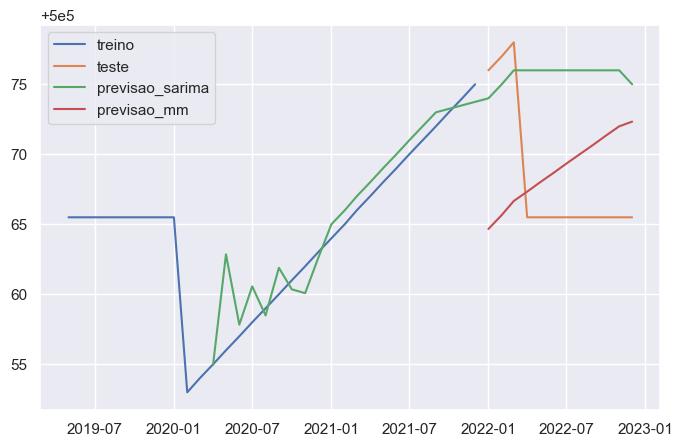

 50%|██████████████████████████████████████████                                          | 1/2 [00:18<00:18, 18.74s/it]

previsão de consumo ano:  6000907.997671327
previsão de consumo ano mm:  6000826.665890442
consumo real:  6000820.5
erro em KWh:  -87.49767132662237
erro em KWh mm:  -6.165890442207456
erro percentual: 0.00%
erro percentual mm: 0.00%
################### Filial SP #####################


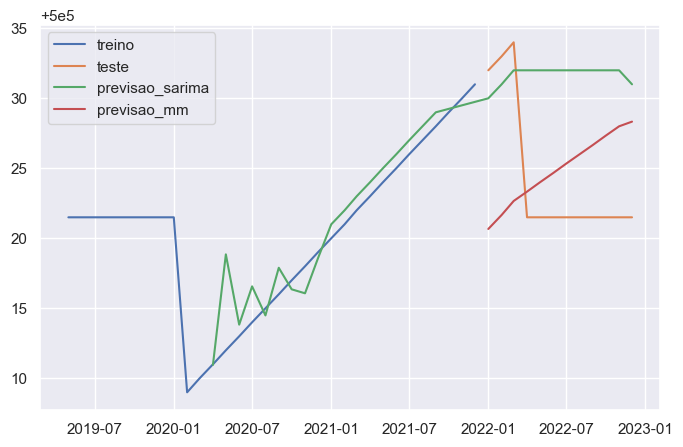

100%|████████████████████████████████████████████████████████████████████████████████████| 2/2 [00:36<00:00, 18.45s/it]

previsão de consumo ano:  6000379.99829204
previsão de consumo ano mm:  6000298.666097346
consumo real:  6000292.5
erro em KWh:  -87.49829204007983
erro em KWh mm:  -6.166097345761955
erro percentual: 0.00%
erro percentual mm: 0.00%


In [68]:
########### TESTE #########
import warnings
warnings.filterwarnings('ignore')
 
janela = 12
sarimaParameters = {'p': 1, 'd': 1, 'q': 4, 'P': 0, 'D': 0, 'Q': 0, 'm': 12}
 
df_decompose = df_teste.copy()
 
resultados_sarimax = []
for a in tqdm.tqdm(range(len(df_teste))): 
#for a in tqdm.tqdm(range(10)):
    row = df_decompose.iloc[a,1:]    
    df_comb =pd.DataFrame(list(zip(row.index,row)),columns=['DATE','VALUE'])    
    df_comb['DATE'] = pd.to_datetime(df_comb['DATE'], format="%m/%Y")
    df_comb['VALUE'] = df_comb['VALUE'].astype(float)   
 
    agencia = str(df_decompose.iloc[a,0])
   
    serie = pd.Series(df_comb['VALUE'].values, index = df_comb['DATE'])
   
    # removendo outliers
    median = serie.median()
    std = serie.std()
    outliers = (serie - median).abs() > std
    serie[outliers] = median
   
    
    train, test = split_train_test(serie)
   
    print('################### Filial ' + agencia + ' #####################')
   
    consumo,previsao,erro, modelo, erro_mm = rollinwWndow(train, test, janela, sarimaParameters, agencia)   
    resultados_sarimax.append((agencia, previsao, consumo, erro, modelo, erro_mm))

0.0014581644530164972
0.00010275703447026885


<AxesSubplot:>

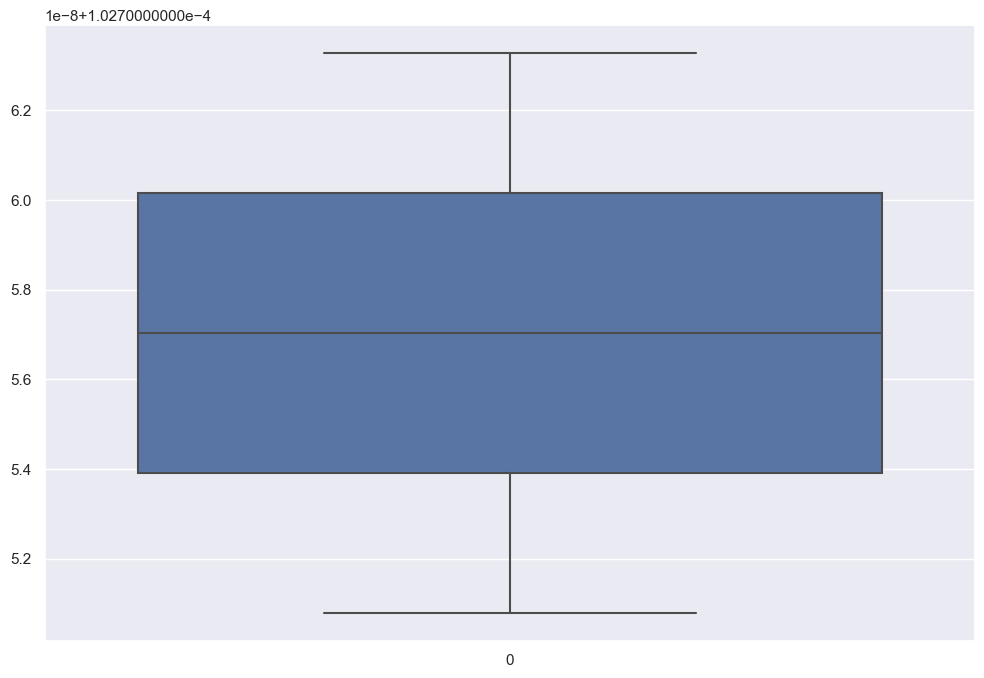

In [69]:
df_resultados_sarimax = pd.DataFrame(resultados_sarimax, columns = ['agencia', 'previsao', 'consumo', 'erro', 'modelo', 'erro_mm'])
df_resultados_sarimax.dropna()
 
erros = df_resultados_sarimax['erro'].values
print(statistics.median(erros))
 
erro_mm = df_resultados_sarimax['erro_mm'].values
print(statistics.median(erro_mm))
 
 
f = plt.figure(figsize=(12,8))
sns.boxplot(data = erro_mm)